In [1]:
import torch

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [2]:
import torch.nn as nn

In [3]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [4]:
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()

_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(64.7370, device='cuda:0', grad_fn=<MseLossBackward>)


In [5]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [6]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.detach().cpu())

Text(0, 0.5, 'loss value')

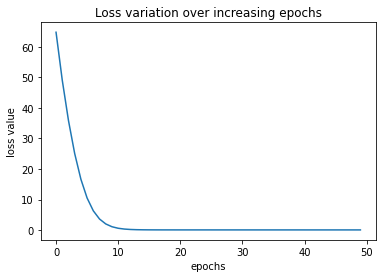

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')